In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from util import read_experiment_df

In [2]:
sns.set()

df = read_experiment_df("data/experiment.log")
#df = df[df['time'] < 45000]
df.head()

,experiment_id,hyperparameters.data.num_epochs,hyperparameters.data.shuffle,hyperparameters.model.l1_regularization_strength,hyperparameters.model.l2_regularization_strength,hyperparameters.model.learning_rate,interval_seconds,metrics.accuracy,metrics.accuracy_baseline,metrics.auc,metrics.auc_precision_recall,metrics.average_loss,metrics.global_step,metrics.label/mean,metrics.loss,metrics.precision,metrics.prediction/mean,metrics.recall,partition,time
0,60_mins_defaults,1,False,0.5,0.5,0.1,3600,0.802989,0.802989,0.500000,0.598505,0.693147,0.0,0.197011,85.026077,0.000000,0.500000,0.000000,0,0
1,60_mins_defaults,1,False,0.5,0.5,0.1,3600,0.799163,0.747280,0.766955,0.582605,0.523038,18.0,0.252720,62.503010,0.684524,0.186920,0.380795,1,3600
2,60_mins_defaults,1,False,0.5,0.5,0.1,3600,0.785795,0.688839,0.786961,0.628643,0.534750,28.0,0.311161,67.760475,0.700935,0.299037,0.543478,2,7200
3,60_mins_defaults,1,False,0.5,0.5,0.1,3600,0.803390,0.764407,0.818728,0.602796,0.446633,35.0,0.235593,52.702644,0.595833,0.262523,0.514389,3,10800
4,60_mins_defaults,1,False,0.5,0.5,0.1,3600,0.829904,0.821674,0.798050,0.499967,0.420630,45.0,0.178326,53.328514,0.525316,0.214204,0.478846,4,14400


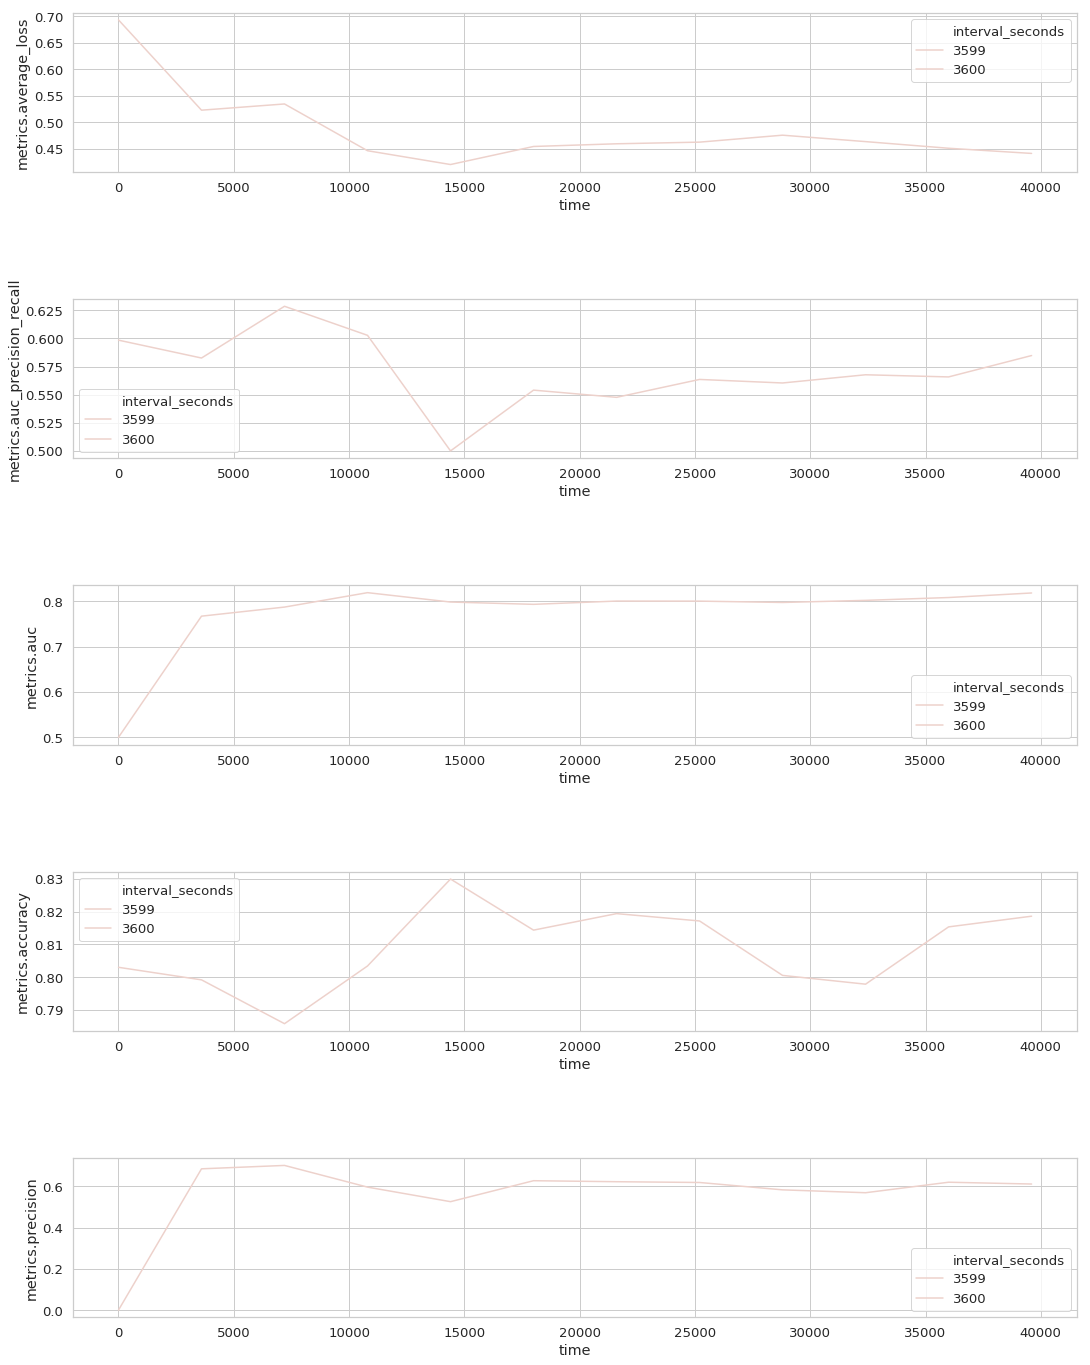

In [17]:
sns.set_palette("Blues")
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

metrics = [
    "metrics.average_loss",
    "metrics.auc_precision_recall",
    "metrics.auc",
    "metrics.accuracy",
    "metrics.precision"
]

f, axes = plt.subplots(len(metrics), 1)
f.set_figheight(24)
f.set_figwidth(18)

for i, y in enumerate(metrics):
    sns.lineplot(
        x="time", 
        y=y, 
        #col="interval_seconds", 
        #kind="line", 
        hue="interval_seconds", 
        data=df,
        ax=axes[i],
        color=sns.color_palette()
    )
    
plt.subplots_adjust(hspace = 0.8)